In [54]:
import pandas as pd
import os
import numpy as np

In [7]:
path='/Users/debruppaul/Documents/ml/pandas/dataset/'

In [9]:
courses = pd.read_csv(path+'courses.csv')
students = pd.read_csv(path+'students.csv')
nov = pd.read_csv(path+'reg-month1.csv')
dec = pd.read_csv(path+'reg-month2.csv')

matches = pd.read_csv(path+'matches.csv')
delivery = pd.read_csv(path+'deliveries.csv')

In [17]:
courses.head()


,course_id,course_name,price
0,1,python,2499
1,2,sql,3499
2,3,data analysis,4999
3,4,machine learning,9999
4,5,tableau,2499


In [11]:
students.head()

,student_id,name,partner
0,1,Kailash Harjo,23
1,2,Esha Butala,1
2,3,Parveen Bhalla,3
3,4,Marlo Dugal,14
4,5,Kusum Bahri,6


In [12]:
nov.head()

,student_id,course_id
0,23,1
1,15,5
2,18,6
3,23,4
4,16,9


In [13]:
dec.head()

,student_id,course_id
0,3,5
1,16,7
2,12,10
3,12,1
4,14,9


In [14]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [15]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [22]:
regs=pd.concat([nov,dec],ignore_index=True)
regs.head()

,student_id,course_id
0,23,1
1,15,5
2,18,6
3,23,4
4,16,9


In [21]:
courses.head()

,course_id,course_name,price
0,1,python,2499
1,2,sql,3499
2,3,data analysis,4999
3,4,machine learning,9999
4,5,tableau,2499


In [28]:
mreg=regs.merge(courses,how="inner",on="course_id")
mreg.head()

,student_id,course_id,course_name,price
0,23,1,python,2499
1,18,1,python,2499
2,1,1,python,2499
3,15,1,python,2499
4,21,1,python,2499


In [27]:
mreg.price.sum()

154247

In [43]:
mult=pd.concat([nov,dec],keys=["nov","dec"]).reset_index()
mult.head()

,level_0,level_1,student_id,course_id
0,nov,0,23,1
1,nov,1,15,5
2,nov,2,18,6
3,nov,3,23,4
4,nov,4,16,9


In [42]:
mult1=mult.merge(courses,how="inner",on="course_id").groupby("level_0")
mult1.sum()

/var/folders/5x/y57vz3lj3017tystcxcrhpmm0000gn/T/ipykernel_84296/926264949.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mult1.sum()


,level_1,student_id,course_id,price
level_0,,,,
dec,378,441,176,65072
nov,300,405,111,89175


In [66]:
regs.merge(courses,on="course_id").merge(students,on="student_id").head()#[["name","course_name","price"]].head()

,student_id,course_id,course_name,price,name,partner
0,23,1,python,2499,Chhavi Lachman,18
1,23,5,tableau,2499,Chhavi Lachman,18
2,23,6,power bi,1899,Chhavi Lachman,18
3,23,4,machine learning,9999,Chhavi Lachman,18
4,23,9,plotly,699,Chhavi Lachman,18


<Axes: xlabel='course_name'>

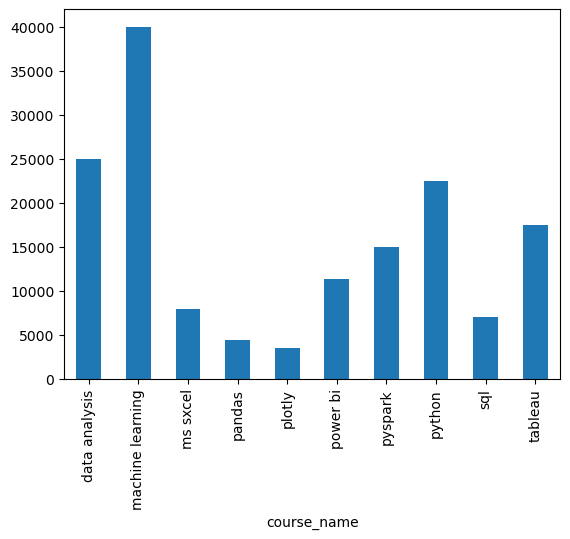

In [49]:
mreg.groupby("course_name").price.sum().plot(kind='bar')

In [57]:
nov.merge(students,how="inner",on="student_id")

,student_id,course_id,name,partner
0,23,1,Chhavi Lachman,18
1,23,4,Chhavi Lachman,18
2,23,3,Chhavi Lachman,18
3,23,6,Chhavi Lachman,18
4,15,5,Preet Sha,16
5,15,1,Preet Sha,16
6,18,6,Fardeen Mahabir,13
7,18,1,Fardeen Mahabir,13
8,16,9,Elias Dodiya,25
9,16,5,Elias Dodiya,25


In [59]:
inter=np.intersect1d(nov["student_id"],dec["student_id"])

In [63]:
df=pd.DataFrame(inter,columns=["student_id"])
df

,student_id
0,1
1,3
2,7
3,11
4,16
5,17
6,18
7,22
8,23


In [64]:
df.merge(students,how="inner",on="student_id")

,student_id,name,partner
0,1,Kailash Harjo,23
1,3,Parveen Bhalla,3
2,7,Tarun Thaker,9
3,11,David Mukhopadhyay,20
4,16,Elias Dodiya,25
5,17,Yasmin Palan,7
6,18,Fardeen Mahabir,13
7,22,Yash Sethi,21
8,23,Chhavi Lachman,18


In [74]:
vreg=regs.merge(courses,how="outer",on="course_id")
vreg.groupby("course_name")["course_name"].value_counts()

course_name       course_name     
C++               C++                 1
Numpy             Numpy               1
data analysis     data analysis       5
machine learning  machine learning    4
ms sxcel          ms sxcel            5
pandas            pandas              4
plotly            plotly              5
power bi          power bi            6
pyspark           pyspark             6
python            python              9
sql               sql                 2
tableau           tableau             7
Name: course_name, dtype: int64

In [79]:
tnp1=np.setdiff1d(courses["course_id"],regs["course_id"])
courses[courses["course_id"].isin(tnp1)]

,course_id,course_name,price
10,11,Numpy,699
11,12,C++,1299


In [81]:
tnp2=np.setdiff1d(students["student_id"],regs["student_id"])
students[students["student_id"].isin(tnp2)]

,student_id,name,partner
3,4,Marlo Dugal,14
4,5,Kusum Bahri,6
5,6,Lakshmi Contractor,10
7,8,Radheshyam Dey,5
8,9,Nitika Chatterjee,4
9,10,Aayushman Sant,8
19,20,Hanuman Hegde,11


In [87]:
students.merge(students,how="inner",left_on="partner",right_on="student_id")[["name_x","name_y"]]

,name_x,name_y
0,Kailash Harjo,Chhavi Lachman
1,Esha Butala,Kailash Harjo
2,Parveen Bhalla,Parveen Bhalla
3,Marlo Dugal,Pranab Natarajan
4,Kusum Bahri,Lakshmi Contractor
5,Lakshmi Contractor,Aayushman Sant
6,Tarun Thaker,Nitika Chatterjee
7,Radheshyam Dey,Kusum Bahri
8,Nitika Chatterjee,Marlo Dugal
9,Aayushman Sant,Radheshyam Dey


In [95]:
tnp5=regs.merge(students,on="student_id")
tnp5.groupby(["student_id","name"])["name"].count().sort_values(ascending=False)

student_id  name              
23          Chhavi Lachman        6
7           Tarun Thaker          5
1           Kailash Harjo         4
12          Radha Dutt            4
14          Pranab Natarajan      4
16          Elias Dodiya          4
11          David Mukhopadhyay    3
18          Fardeen Mahabir       3
22          Yash Sethi            3
15          Preet Sha             2
17          Yasmin Palan          2
19          Qabeel Raman          2
3           Parveen Bhalla        2
25          Shashank D’Alia       2
13          Munni Varghese        1
2           Esha Butala           1
21          Seema Kota            1
24          Radhika Suri          1
Name: name, dtype: int64

In [99]:
tnp6=tnp5.merge(courses,on="course_id")
tnp6.groupby(["student_id","name"])["price"].sum().sort_values(ascending=False)

student_id  name              
23          Chhavi Lachman        22594
14          Pranab Natarajan      15096
19          Qabeel Raman          13498
7           Tarun Thaker          10595
24          Radhika Suri           9999
16          Elias Dodiya           9796
22          Yash Sethi             9397
12          Radha Dutt             9096
1           Kailash Harjo          7596
3           Parveen Bhalla         7498
18          Fardeen Mahabir        5497
11          David Mukhopadhyay     5197
13          Munni Varghese         4999
15          Preet Sha              4998
25          Shashank D’Alia        4998
17          Yasmin Palan           4098
2           Esha Butala            2499
21          Seema Kota             2499
Name: price, dtype: int64

In [103]:
delivery.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [104]:
matches.head(3)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN


In [106]:
tnp7=delivery.merge(matches,left_on="match_id",right_on="id")
tnp8=tnp7[tnp7["batsman_runs"]==6]

In [114]:
tnp9=tnp8.groupby("venue")["batsman_runs"].count()

In [115]:
tnp10=matches.groupby("venue")["id"].count()

# expected no of sixes in a match at given statduim(record of sixes per match)
means if 1 match is in Holkar it is expected to have 17 sixes

<Axes: xlabel='venue', ylabel='expecte no of sixes'>

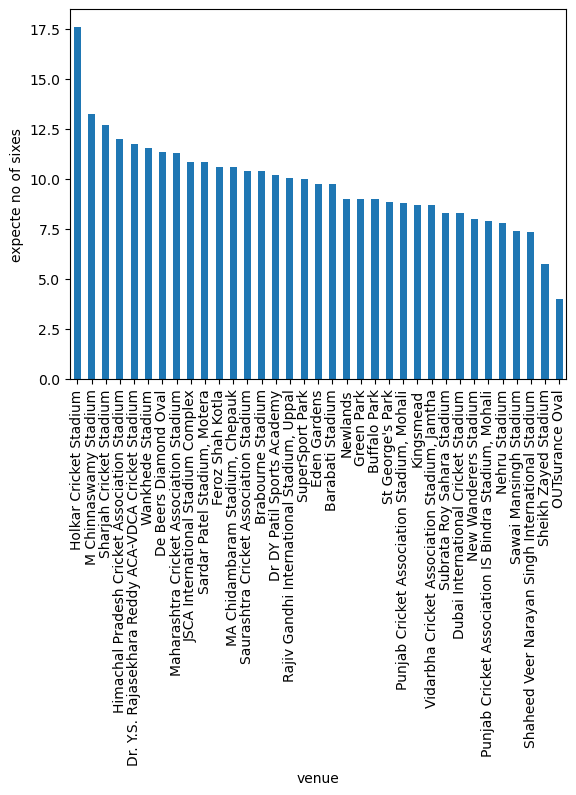

In [127]:
tnp11=tnp9/tnp10
tnp11.sort_values(ascending=False).plot(kind="bar",ylabel="expecte no of sixes")

# Orange Cap Holder with Runs in all season


In [137]:
tnp7.groupby(["season","batsman"])["batsman_runs"].sum().reset_index().sort_values("batsman_runs",ascending=False).drop_duplicates(subset=["season"],keep="first")

,season,batsman,batsman_runs
1383,2016,V Kohli,973
910,2013,MEK Hussey,733
684,2012,CH Gayle,733
1088,2014,RV Uthappa,660
1422,2017,DA Warner,641
446,2010,SR Tendulkar,618
115,2008,SE Marsh,616
502,2011,CH Gayle,608
229,2009,ML Hayden,572
1148,2015,DA Warner,562
